# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score #, cross_val_predict
from sklearn import metrics,tree,preprocessing#,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,roc_curve#, auc
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_csv(r"C:/Users/babit/OneDrive/Desktop/SEM 2/DAPA/DataCoSupplyChainDataset.csv",encoding = "ISO-8859-1")
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## Dropping irrelevant Columns with unique values which does not influence late delivery in the dataset

In [3]:
df=df.drop(['Customer Email','Customer Fname','Customer Id','Customer Lname','Customer Password','Customer Street',
'Latitude','Longitude','Order Id','Product Image'],axis=1)
df.shape

(180519, 43)

## Handling missing values in pandas dataframe

In [4]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Segment                      0
Customer State                        0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Market                                0
Order City                            0
Order Country                         0
Order Customer Id                     0
order date (DateOrders)               0
Order Item Cardprod Id                0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0


In [5]:
#exclude columns Product Description and Product Description from dataframe

del df['Product Description']
del df['Order Zipcode']
del df['Product Status']
#Porduct status has only zero in all the rows, hence it is also removed

 ## Handling Outliers in the dataset

In [6]:
#exclude outliers from the dataset
print("Number of rows before removing outliers ",len(df))
numeric_col = ['Days for shipping (real)','Days for shipment (scheduled)','Benefit per order','Sales per customer','Order Item Discount','Order Item Discount Rate','Order Item Product Price','Order Item Profit Ratio','Sales','Order Item Total','Order Profit Per Order','Product Price']

Number of rows before removing outliers  180519


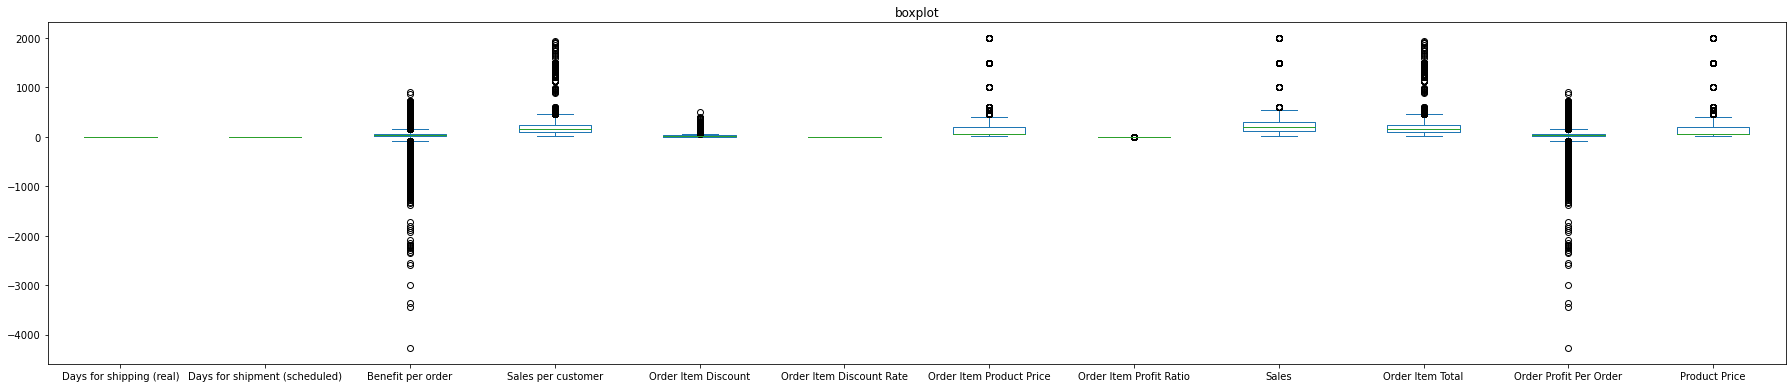

In [7]:
plt.rcParams["figure.figsize"] = [25, 5.50]
plt.rcParams["figure.autolayout"] = True
ax = df[numeric_col].plot(kind='box', title='boxplot')
plt.show()

In [8]:
#except Days for shipping (real), Days for shipment (scheduled) and Order Item Discount Rate, outliers are present in other columns
outlier_cols = ['Benefit per order','Sales per customer','Order Item Discount','Order Item Product Price','Order Item Profit Ratio','Sales','Order Item Total','Order Profit Per Order','Product Price']
for x in outlier_cols:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [9]:
df.isnull().sum()

Type                                 0
Days for shipping (real)             0
Days for shipment (scheduled)        0
Benefit per order                18942
Sales per customer                1943
Delivery Status                      0
Late_delivery_risk                   0
Category Id                          0
Category Name                        0
Customer City                        0
Customer Country                     0
Customer Segment                     0
Customer State                       0
Customer Zipcode                     3
Department Id                        0
Department Name                      0
Market                               0
Order City                           0
Order Country                        0
Order Customer Id                    0
order date (DateOrders)              0
Order Item Cardprod Id               0
Order Item Discount               7537
Order Item Discount Rate             0
Order Item Id                        0
Order Item Product Price 

In [10]:
df = df.dropna(axis = 0)

In [11]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales               

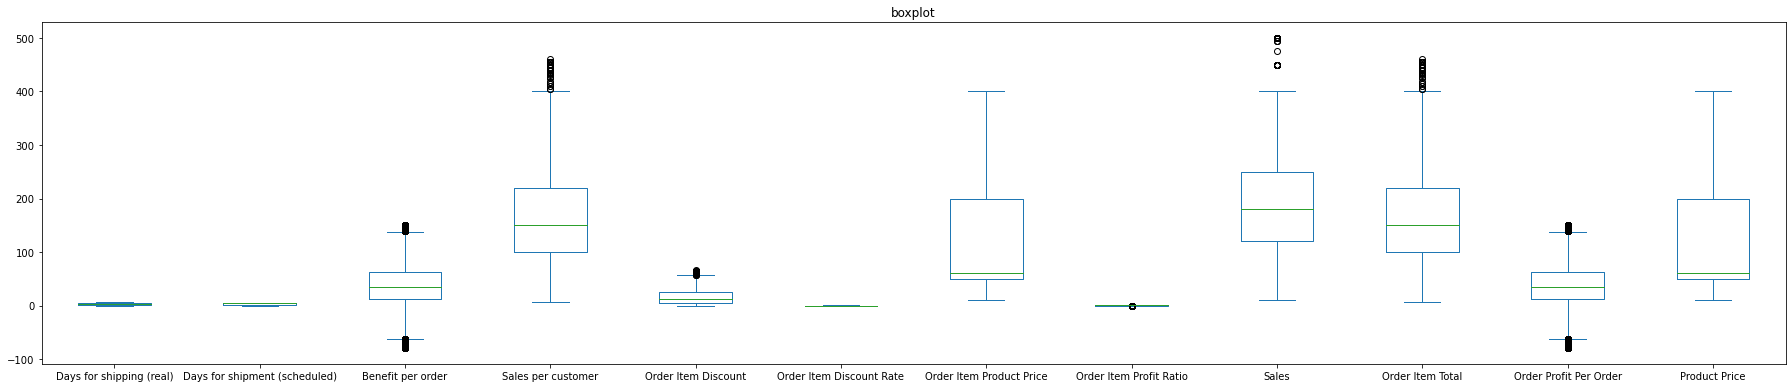

In [12]:
#Box plot after removing potential outliers
plt.rcParams["figure.figsize"] = [25, 5.50]
plt.rcParams["figure.autolayout"] = True
ax = df[numeric_col].plot(kind='box', title='boxplot')
plt.show()

In [13]:
print("Number of rows after removing outliers ",len(df))

Number of rows after removing outliers  150482


In [14]:
df.shape

(150482, 40)

## Handling multi-collinearity

## Heat Map before handling Multi-collinearity

<AxesSubplot:>

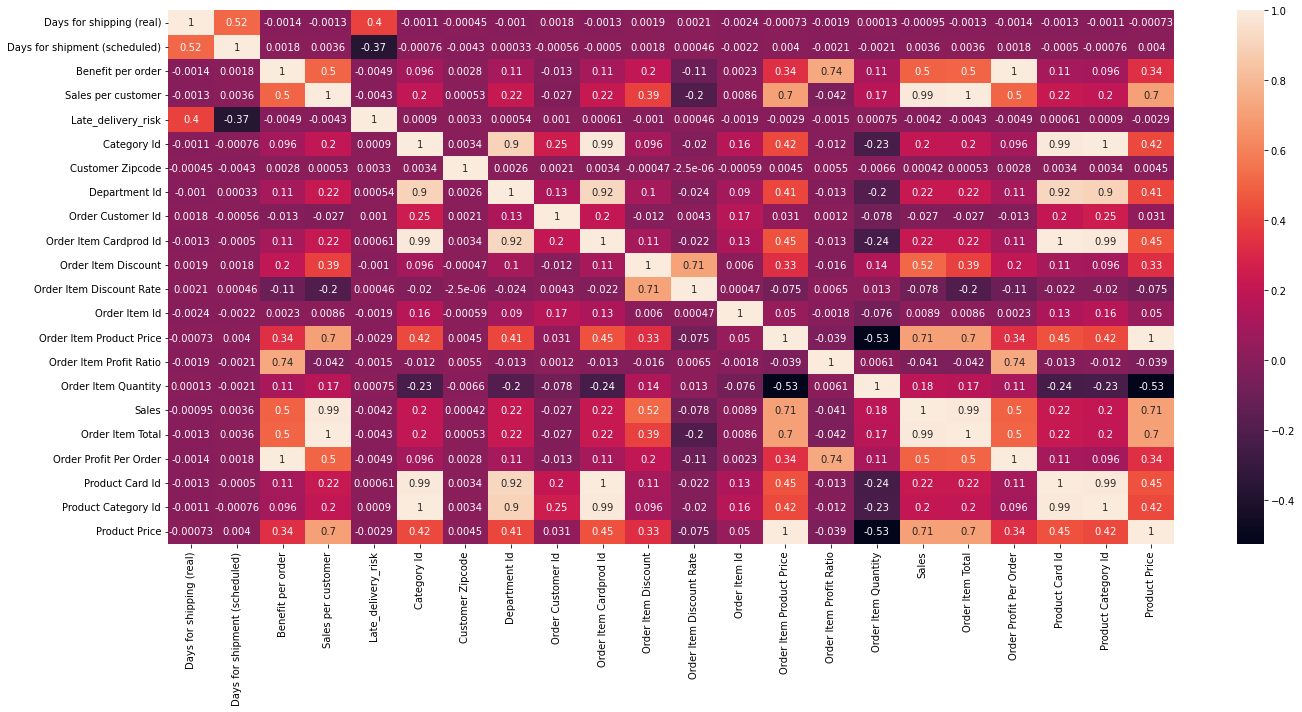

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)

In [16]:
target_col = df['Late_delivery_risk']
target_col

0         0
3         0
4         0
5         0
6         1
         ..
180507    1
180508    1
180509    0
180514    0
180516    1
Name: Late_delivery_risk, Length: 150482, dtype: int64

In [17]:
def handling_correlation(X_train,threshold=0.7):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if ((abs(corr_matrix.iloc[i, j]) >threshold) or (abs(corr_matrix.iloc[i, j]) < -(threshold))) :
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

df_drop=handling_correlation(df,0.7)

In [18]:
df_drop

['Sales',
 'Product Card Id',
 'Department Id',
 'Product Price',
 'Order Profit Per Order',
 'Order Item Total',
 'Order Item Profit Ratio',
 'Order Item Product Price',
 'Order Item Cardprod Id',
 'Order Item Discount Rate',
 'Product Category Id']

In [19]:
df=df.drop(df_drop,axis=1)

In [20]:
print('Number of columns :', df.shape[1])

Number of columns : 29


## HEAT MAP after handling multicollinearity

## Pearson Correlation Coefficeint

In [21]:
df.corr()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Zipcode,Order Customer Id,Order Item Discount,Order Item Id,Order Item Quantity
Days for shipping (real),1.000000,0.515852,-0.001448,-0.001336,0.401688,-0.001051,-0.000455,0.001840,0.001872,-0.002380,0.000133
Days for shipment (scheduled),0.515852,1.000000,0.001777,0.003555,-0.369300,-0.000764,-0.004278,-0.000561,0.001834,-0.002150,-0.002083
Benefit per order,-0.001448,0.001777,1.000000,0.501969,-0.004946,0.095940,0.002751,-0.012836,0.197876,0.002340,0.110566
Sales per customer,-0.001336,0.003555,0.501969,1.000000,-0.004341,0.201082,0.000533,-0.027103,0.387936,0.008599,0.169274
Late_delivery_risk,0.401688,-0.369300,-0.004946,-0.004341,1.000000,0.000901,0.003252,0.001004,-0.001007,-0.001883,0.000753
Category Id,-0.001051,-0.000764,0.095940,0.201082,0.000901,1.000000,0.003388,0.249251,0.096175,0.161834,-0.231428
Customer Zipcode,-0.000455,-0.004278,0.002751,0.000533,0.003252,0.003388,1.000000,0.002057,-0.000472,-0.000591,-0.006591
Order Customer Id,0.001840,-0.000561,-0.012836,-0.027103,0.001004,0.249251,0.002057,1.000000,-0.012296,0.165876,-0.078355
Order Item Discount,0.001872,0.001834,0.197876,0.387936,-0.001007,0.096175,-0.000472,-0.012296,1.000000,0.005979,0.140488
Order Item Id,-0.002380,-0.002150,0.002340,0.008599,-0.001883,0.161834,-0.000591,0.165876,0.005979,1.000000,-0.075691


<AxesSubplot:>

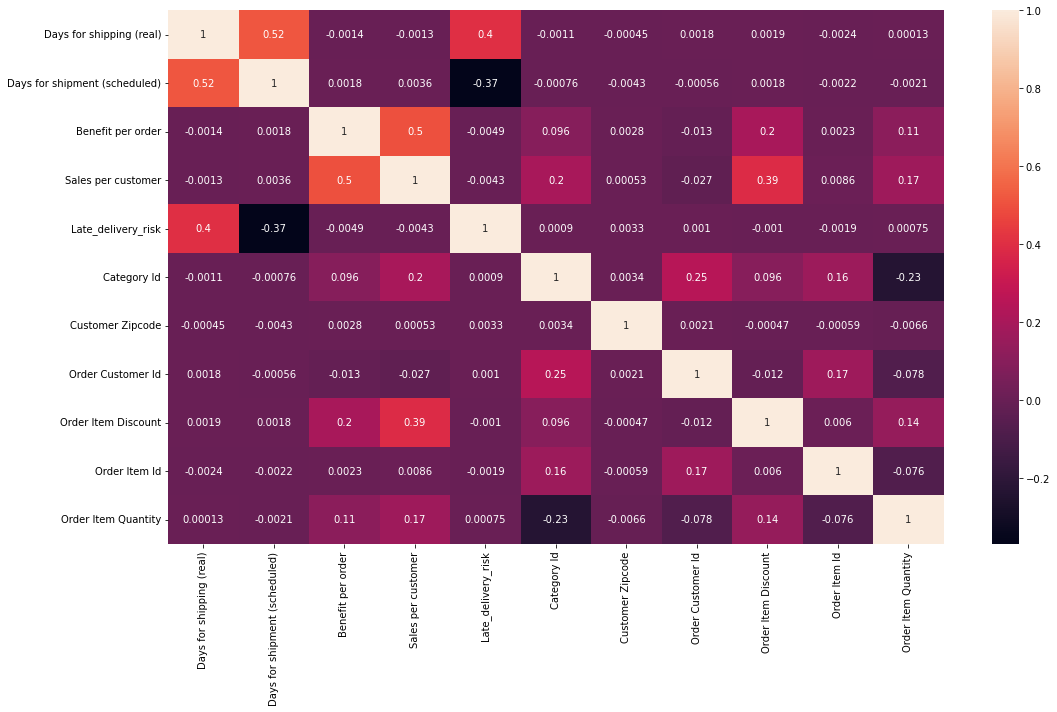

In [22]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True)

# Preliminary Visualizations

Text(0.5, 1.0, 'Top 10 Prodcts Category Name with Late Deliveries')

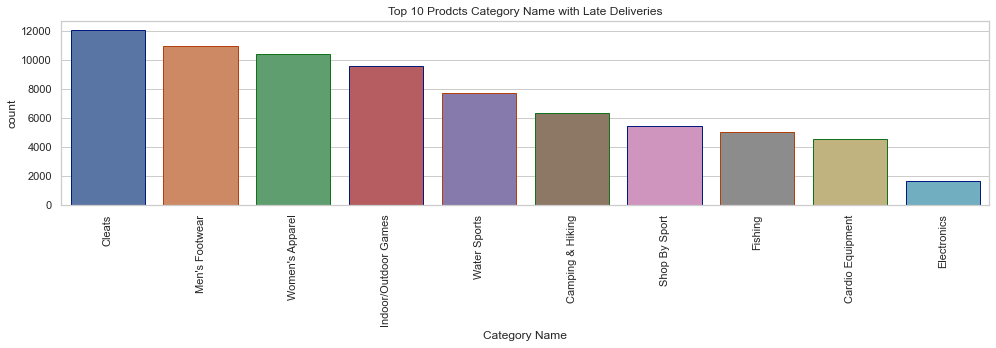

In [24]:
late_delivery = df[(df['Delivery Status'] == 'Late delivery')]
Neg_Ben = df[(df['Benefit per order']<0)]
sns.set(style="whitegrid")
plt.figure(figsize=(14,5))
ax=sns.countplot(x=late_delivery['Category Name'],
                   linewidth=1,
                   edgecolor=sns.color_palette("dark", 3), data=late_delivery,order = Neg_Ben['Category Name'].value_counts().iloc[:10].index)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Top 10 Prodcts Category Name with Late Deliveries")

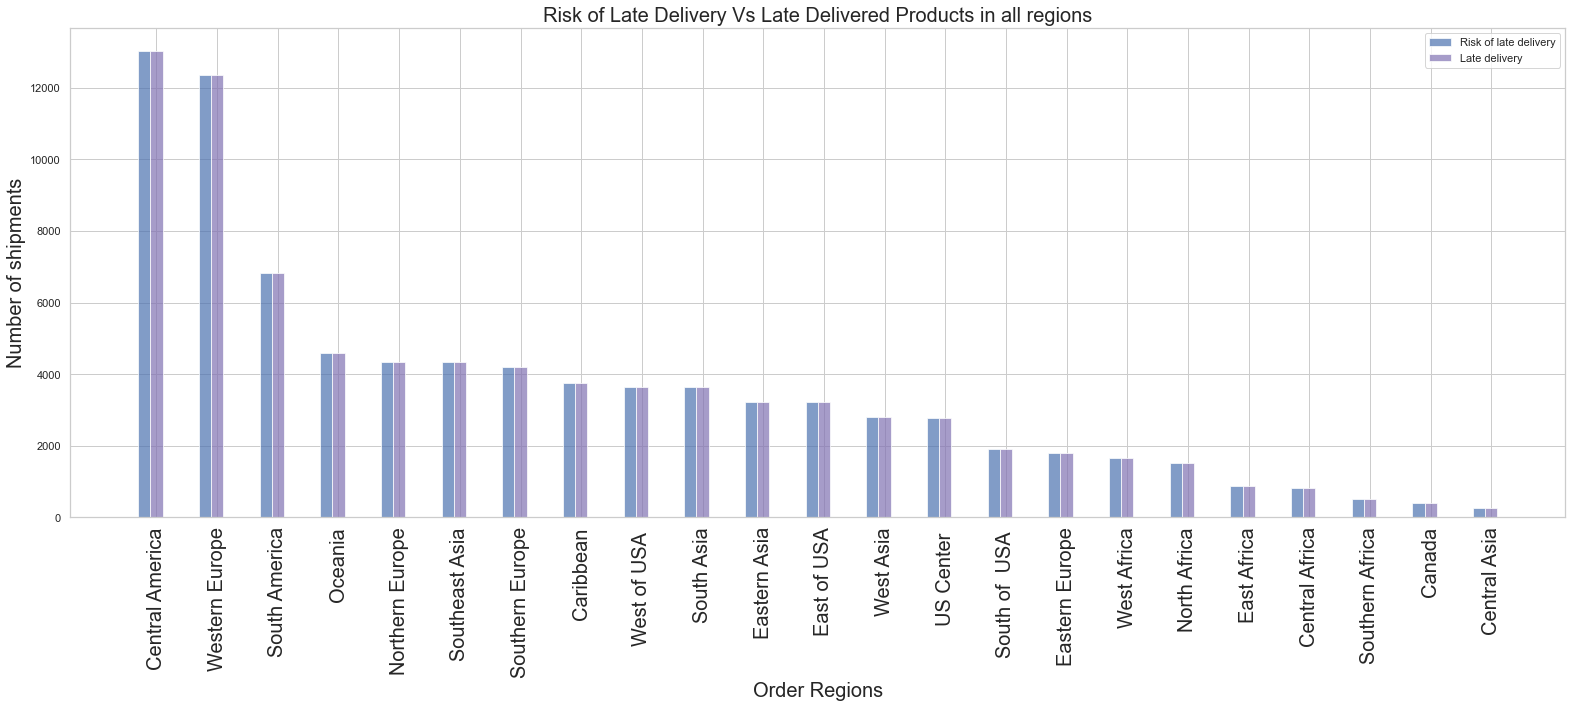

In [25]:
late_delivery_risk = df[(df['Late_delivery_risk'] == 1)]

Reg_name=df['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(22,10)) 
index=np.arange(n_groups)
bar_width=0.2
ax1=plt.bar(index,late_delivery_risk['Order Region'].value_counts(),bar_width,alpha=0.7,color='b',label='Risk of late delivery')
ax2=plt.bar(index+bar_width,late_delivery['Order Region'].value_counts(),bar_width,alpha=0.7,color='m',label='Late delivery')
plt.xlabel('Order Regions',fontsize=20)
plt.ylabel('Number of shipments',fontsize=20)
plt.title('Risk of Late Delivery Vs Late Delivered Products in all regions',fontsize=20)
plt.legend()
plt.xticks(index+bar_width,Reg_name,rotation=90,fontsize=20)
plt.tight_layout()
plt.show()

From this it is clear that the products marked with late delivery risk are actually delivered late across all regions. So, we should change the shipment method to avoid late deliveries. For that we should also explore late deliveries across each shipment mode in all regions.

Text(0.5, 1.0, 'Shipment Modes with Late Deliveries')

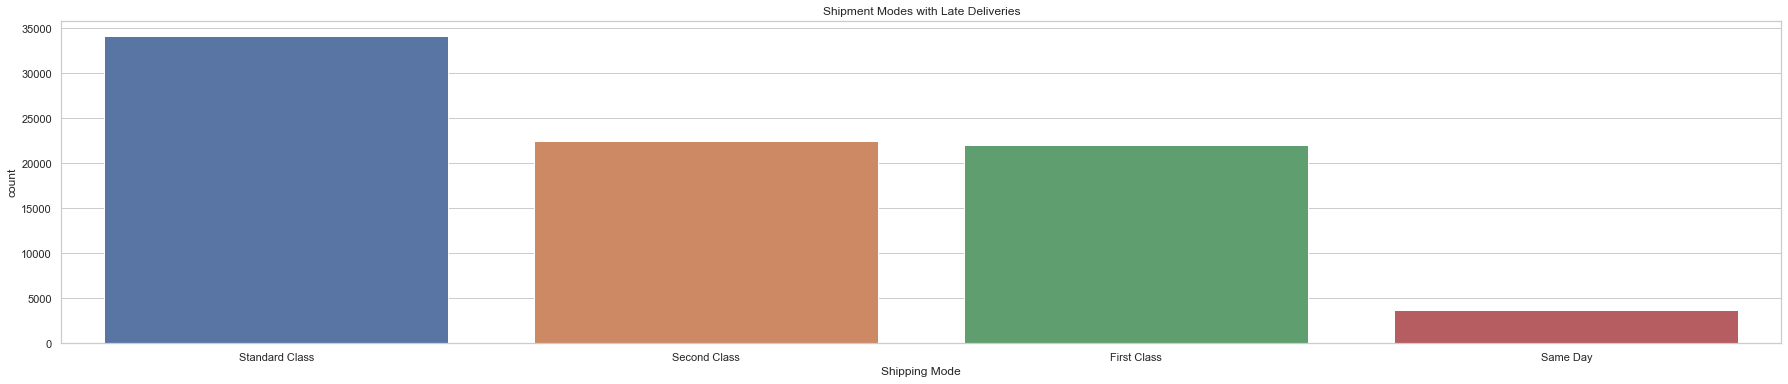

In [26]:
ax=sns.countplot( late_delivery['Shipping Mode'], order = late_delivery['Shipping Mode'].value_counts().index)
ax.set_title("Shipment Modes with Late Deliveries")

Text(0.5, 1.0, 'Order Region with their late deliveries due to their Shipment Type')

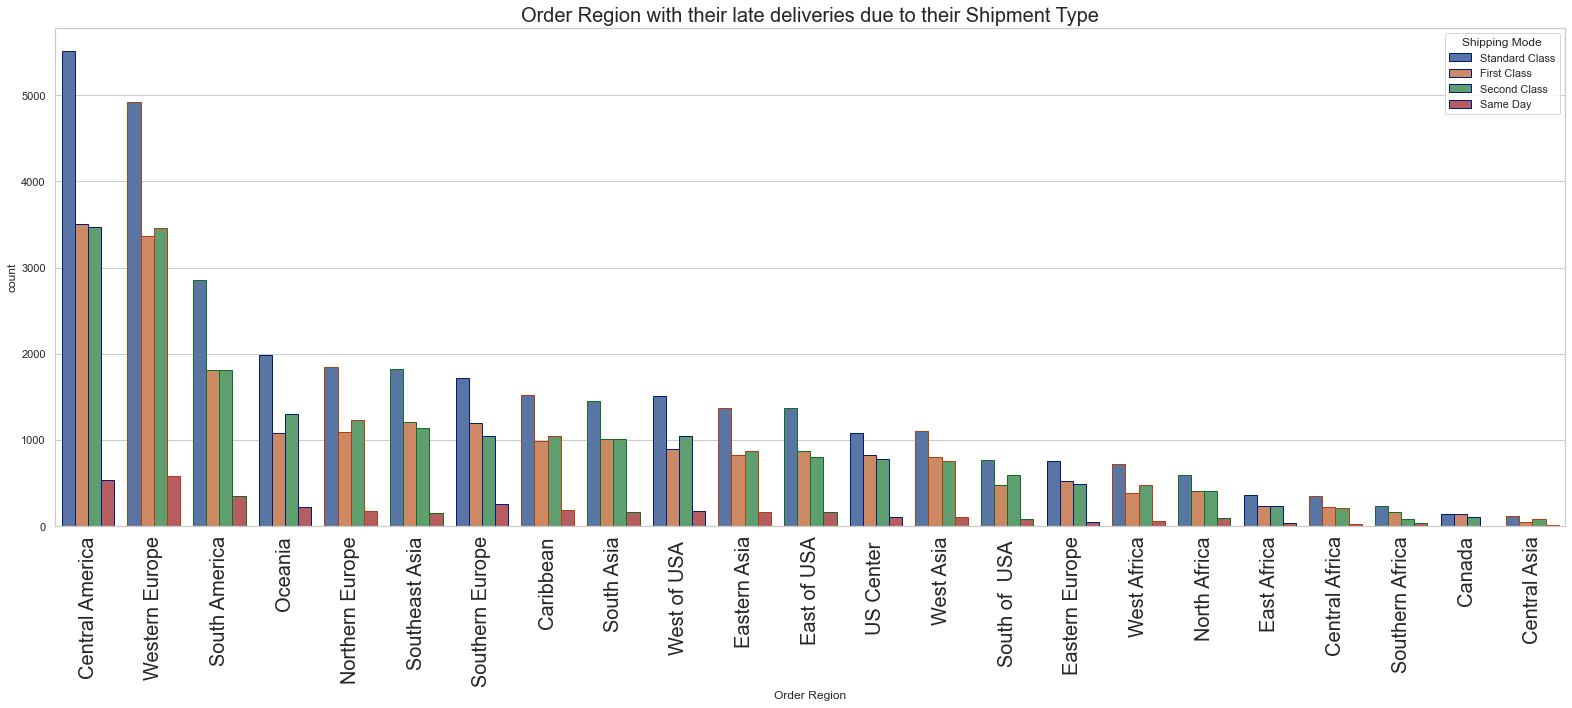

In [27]:
fig,ax = plt.subplots(figsize=(22,10)) 
ax=sns.countplot(x=late_delivery['Order Region'], hue=df['Shipping Mode'],
                   linewidth=1,
                   edgecolor=sns.color_palette("dark", 3), data=late_delivery,order = late_delivery['Order Region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=20)
ax.set_title("Order Region with their late deliveries due to their Shipment Type",fontsize=20)

It is found that four types of shipment methods are used and standard class shipment method is causing the most late deliveries followed by Second class and First Class whereas Same has the least late deliveries across all regions.

# Modelling

In [28]:
# Drop Target column and its high correlated featues associated to it
del df['Late_delivery_risk']
del df['Delivery Status']
del df['Days for shipping (real)']
del df['Days for shipment (scheduled)']
df.dtypes

Type                           object
Benefit per order             float64
Sales per customer            float64
Category Id                     int64
Category Name                  object
Customer City                  object
Customer Country               object
Customer Segment               object
Customer State                 object
Customer Zipcode              float64
Department Name                object
Market                         object
Order City                     object
Order Country                  object
Order Customer Id               int64
order date (DateOrders)        object
Order Item Discount           float64
Order Item Id                   int64
Order Item Quantity             int64
Order Region                   object
Order State                    object
Order Status                   object
Product Name                   object
shipping date (DateOrders)     object
Shipping Mode                  object
dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()


df['Type']              = business_coder.fit_transform(df['Type'])
df['Category Name']      = business_coder.fit_transform(df['Category Name'])
df['Customer Segment']  = business_coder.fit_transform(df['Customer Segment'])
df['Customer State']    = business_coder.fit_transform(df['Customer State'])
df['Market']      = business_coder.fit_transform(df['Market'])
df['Order City']        = business_coder.fit_transform(df['Order City'])
df['Category Name']     = business_coder.fit_transform(df['Category Name'])
df['Customer City']     = business_coder.fit_transform(df['Customer City'])
df['Department Name']   = business_coder.fit_transform(df['Department Name'])
df['Order State']       = business_coder.fit_transform(df['Order State'])
df['Shipping Mode']     = business_coder.fit_transform(df['Shipping Mode'])
df['Order Status']    = business_coder.fit_transform(df['Order Status'])
df['Order Country']     = business_coder.fit_transform(df['Order Country'])
df['Customer City']     = business_coder.fit_transform(df['Customer City'])
df['Order Region']     = business_coder.fit_transform(df['Order Region'])
df['shipping date (DateOrders)']     = business_coder.fit_transform(df['shipping date (DateOrders)'])

df['Customer Country']     = business_coder.fit_transform(df['Customer Country'])
df['order date (DateOrders)']     = business_coder.fit_transform(df['order date (DateOrders)'])
df['Product Name']     = business_coder.fit_transform(df['Product Name'])


df.head()

,Type,Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,...,order date (DateOrders),Order Item Discount,Order Item Id,Order Item Quantity,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode
0,1,91.250000,314.640015,73,36,65,1,0,34,725.0,...,5476,13.110000,180517,1,15,475,2,71,23727,3
3,1,22.860001,304.809998,73,36,284,0,2,3,90027.0,...,1006,22.940001,179252,1,11,833,2,71,1586,3
4,2,134.210007,298.250000,73,36,65,1,1,34,725.0,...,1005,29.500000,179251,1,11,833,6,71,1389,3
5,3,18.580000,294.980011,73,36,504,0,0,29,14150.0,...,1004,32.779999,179250,1,11,833,0,71,2203,3
6,1,95.180000,288.420013,73,36,65,1,2,34,725.0,...,1003,39.330002,179249,1,7,386,2,71,1386,0


In [30]:
df.dtypes

Type                            int32
Benefit per order             float64
Sales per customer            float64
Category Id                     int64
Category Name                   int64
Customer City                   int64
Customer Country                int32
Customer Segment                int32
Customer State                  int32
Customer Zipcode              float64
Department Name                 int32
Market                          int32
Order City                      int32
Order Country                   int32
Order Customer Id               int64
order date (DateOrders)         int32
Order Item Discount           float64
Order Item Id                   int64
Order Item Quantity             int64
Order Region                    int32
Order State                     int32
Order Status                    int32
Product Name                    int32
shipping date (DateOrders)      int32
Shipping Mode                   int32
dtype: object

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis




In [32]:
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
X_train, X_test,Y_train,Y_test = train_test_split(df,target_col,test_size = 0.2,random_state = 42)

In [33]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [45]:
def classifiermodel(model,X_train, X_test,Y_train,Y_test):
   
    model=model.fit(X_train,Y_train) # Fitting train data for predection of late delivery
    
    yl_pred=model.predict(X_test)  
    
    accuracy_l=accuracy_score(yl_pred, Y_test) #Accuracy for predection of late delivery
    
    recall_l=recall_score(yl_pred, Y_test)# Recall score for predection of late delivery
    
    conf_l=confusion_matrix(Y_test, yl_pred)#predection of late delivery
  
    f1_l=f1_score(Y_test, yl_pred)#predection of late delivery
    print('Model paramters used are :',model)
    
    print('Accuracy of late delivery status is:', (accuracy_l)*100,'%')
    print('Recall score of late delivery status is:', (recall_l)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_l))
    print('F1 score of late delivery status is:', (f1_l)*100,'%')
    print(classification_report(Y_test, yl_pred))

# eXtreme Gradient Boosting Classification

In [46]:
import xgboost as xgb
model_l = xgb.XGBClassifier()
classifiermodel(model_l,X_train, X_test,Y_train,Y_test)

Model paramters used are : XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy of late delivery status is: 90.90939296275377 %
Recall score of late delivery status is: 93.00249687890137 %
Conf Matrix of late delivery status is: 
 [[12462  1121]
 [ 1615 14899]]
F1 score of late delivery status is: 91.59033626360117 %
              precision   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Shipping Mode'),
  Text(1, 0, 'Order Status'),
  Text(2, 0, 'order date (DateOrders)'),
  Text(3, 0, 'shipping date (DateOrders)'),
  Text(4, 0, 'Order Item Id'),
  Text(5, 0, 'Order State'),
  Text(6, 0, 'Order Country'),
  Text(7, 0, 'Customer Zipcode'),
  Text(8, 0, 'Order City'),
  Text(9, 0, 'Market'),
  Text(10, 0, 'Order Region'),
  Text(11, 0, 'Customer City'),
  Text(12, 0, 'Customer Segment'),
  Text(13, 0, 'Order Customer Id'),
  Text(14, 0, 'Category Id'),
  Text(15, 0, 'Customer State'),
  Text(16, 0, 'Department Name'),
  Text(17, 0, 'Product Name'),
  Text(18, 0, 'Type'),
  Text(19, 0, 'Category Name'),
  Text(20, 0, 'Benefit per order'),
  Text(21, 0, 'Order Item Discount'),
  Text(22, 0, 'Sales per customer'),
  Text(23, 0, 'Customer Country'),
  Text(24, 0, 'Order Item Quantity')])

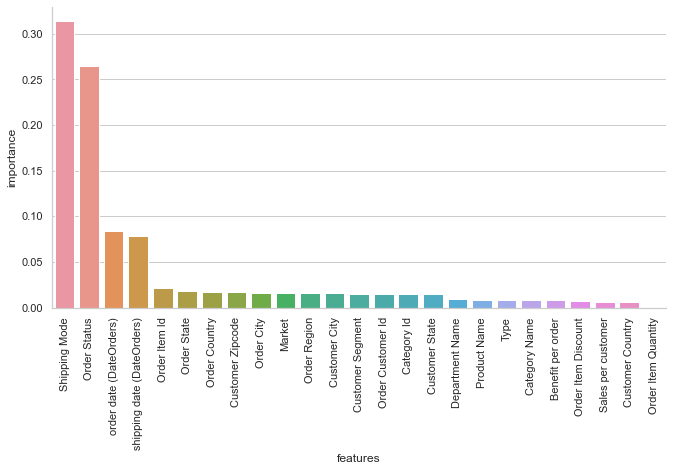

In [38]:
important_col=model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'features':df.columns[important_col],'importance':model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='features', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

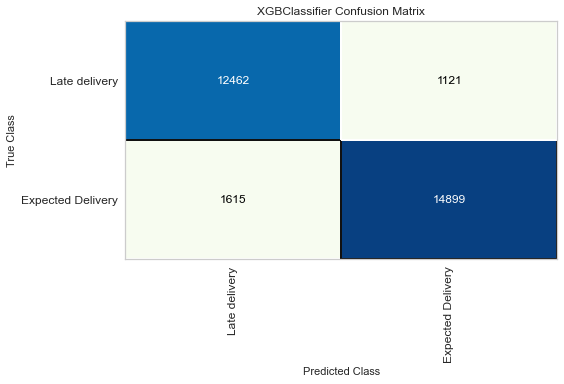

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
# Confusion Matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
classes = ['Late delivery','Expected Delivery']
xgboost_cm = ConfusionMatrix(model_l,classes=classes,cmap='GnBu')

xgboost_cm.fit(X_train, Y_train)
xgboost_cm.score(X_test, Y_test)
xgboost_cm.show()

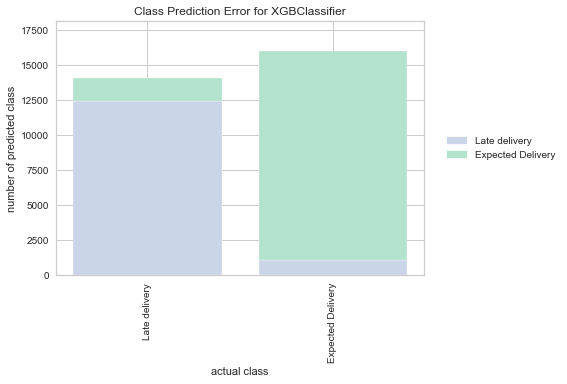

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [40]:
# Error predictions
visualizer = ClassPredictionError(model_l,classes=classes)

set_palette('pastel')

visualizer.fit(X_train, Y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show() 

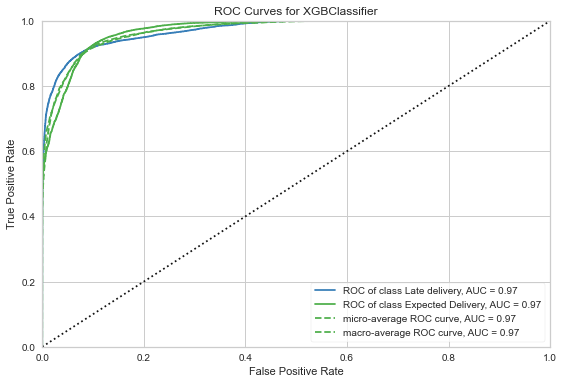

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
# Roc Curve
visualizer = ROCAUC(model_l, classes=classes)

set_palette('bold')

visualizer.fit(X_train, Y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [42]:
#Defining cross validation model
def cross_validation_model(model_l,X_train, X_test,Y_train,Y_test):
    
    model_l = model_l.fit(X_train,Y_train)
    
    scores_l = cross_val_score(model_l, X_train, Y_train, cv=6)
    print('Model used is',model_l)
    
    print('Cross validation accuracy of late : %0.2f (+/- %0.2f)' % (scores_l.mean(), scores_l.std() * 2))

In [43]:
cross_validation_model(model_l,X_train, X_test,Y_train,Y_test)

Model used is XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Cross validation accuracy of late : 0.89 (+/- 0.02)
